In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import sys
sys.path.append('../../utils/')

from utils import *

# Create matrix of outcomes x intvns for assoc, contemp, and lagged

In [55]:
# PE: for a one SD increase in intervention, the # of SD increases in the outcome
# Percent change computation: PE*outcome_SD/baseline (outcome mean for one year prior)

netflix_release_dates = {'tgc': [2019, 10, 16], 'fok': [2011, 5, 6], 'okja': [2017, 6, 28],
                'wth': [2017, 6, 16], 'cowspiracy': [2015, 9, 15], 'owth': [2017, 6, 16],
                        'yawye': [2024, 1,1]}

units = 'weeks'
model = 'lagged'
results_dir = '../results/assoc_contemp_lagged_2024_weeks_2024-06-26_15_47_00.166579/'

results_df = pd.read_csv(results_dir + model + '_df_' + units + '_all_primary.csv')

df_loc = '../data/prepared/merged/merged_' + units + '.csv'
df = pd.read_csv(df_loc)

In [56]:
df.columns

Index(['ds', 'tgc', 'wth', 'cowspiracy', 'fok', 'okja', 'yawye',
       'sustainability', 'animal_welfare', 'climate', 'climate_change',
       'health', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant_based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant_based_behavior', 'behavior_bare', 'informative_bare', 'food',
       'date_col', 'Year', 'Month', 'Day', 'rdpi', 'Zhao', 'StewartMilk',
       'StewartPBMilk', 'Time', 'tgc_bin', 'tgc_bin*Time', 'tgc_bin*Time_C',
       'fok_bin', 'fok_bin*Time', 'fok_bin*Time_C', 'okja_bin',
       'okja_bin*Time', 'okja_bin*Time_C', 'wth_bin', 'wth_bin*Time',
       'wth_bin*Time_C', 'cowspiracy_bin', 'cowspiracy_bin*Time',
       'cowspiracy_bin*Time_C', 'owth_bin', 'owth_bin*Time', 'owth_bin*Time_C',
       'yawye_bin', 'yawye_bin*Time', 'yawye_bin*Time_C', 'all_docs', 'owth',
       'all_climate', 'Month_Dummy1', 'Month_Dummy2', 'Month_Dummy3',
       

In [57]:
def compute_pct_change(intvn, outcome):
    # Get PE and SD
    pe = results_df.loc[results_df['Outcome'] == outcome_map[outcome]][intvn_mp[intvn] + '_pe'].item()
    sd = df[intvn].std()

    # Get pre-intvn baseline
    offset = 12
    if units == 'weeks':
        offset = 52

    elif units == 'days':
        offset = 365

    init_date = df['ds'][0]
    intvn_date = '{y}-{m}-{d}'.format(y=netflix_release_dates[intvn][0], 
                                     m=netflix_release_dates[intvn][1], 
                                     d=netflix_release_dates[intvn][2])
    release_date_time = date_difference(init_date, intvn_date, units)

    pre_release_baseline = df.loc[(df['Time'] < release_date_time) & (df['Time'] > release_date_time - offset)][outcome].mean()

    sd = df[outcome].std()
    pct_increase = (pe*sd)/pre_release_baseline


    print('pe, sd, baseline: ', pe, sd, pre_release_baseline)

    print('pct increase: ', pct_increase)
    
    return pct_increase

In [58]:
outcome = 'plant_based_plus_plant_based'

if units == 'months':
    intvn_mp = {'fok': 'FOK', 'cowspiracy': 'Cowspiracy', 'owth': 'Okja/WTH', 'tgc': 'TGC', 'yawye': 'YAWYE'}
    
elif units == 'weeks':
    intvn_mp = {'fok': 'FOK', 'cowspiracy': 'Cowspiracy', 'wth': 'WTH', 'okja': 'Okja', 
                'tgc': 'TGC', 'yawye': 'YAWYE'}

outcome_map = {'plant_based_plus_plant_based': "Searches: `Plant based'", 
              'vegan': "Searches: `Vegan'", 'vegetarian': "Searches: `Vegetarian'", 'StewartMilk': 'StewartMilk',
              'StewartPBMilk': 'StewartPBMilk', 'Zhao': 'Zhao', 'vegan_informative': "Searches: `Vegan', Informative",
              'vegetarian_informative': "Searches: `Vegetarian', Informative", 
              'plant_based_informative': "Searches: `Plant based', Informative",
              'vegan_behavior': "Searches: `Vegan', Behavior",
              'vegetarian_behavior': "Searches: `Vegetarian', Behavior",
              'plant_based_behavior': "Searches: `Plant based', Behavior"}
    

for intvn in ['wth', 'tgc', 'yawye']:
    print(intvn)
    compute_pct_change(intvn, outcome)

wth
pe, sd, baseline:  0.168779736484168 3.010849119824754 2.1228598744324003
pct increase:  0.23938005855119535
tgc
pe, sd, baseline:  0.153268953600704 3.010849119824754 5.14815550812597
pct increase:  0.08963786997435219
yawye
pe, sd, baseline:  0.1708348099441286 3.010849119824754 6.523429611625659
pct increase:  0.07884776379575732


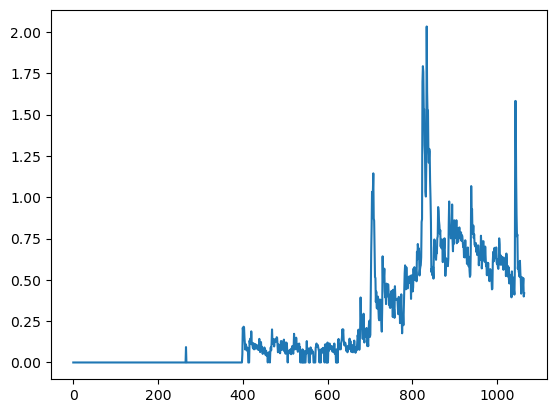

In [59]:
plt.plot(df['plant_based_behavior'])
#plt.plot(df['wth'], label='wth')
#plt.plot(df['tgc'], label='tgc')
#plt.plot(df['yawye'], label='yawye')
